In [61]:
def J(h, theta, x, y):
    """Funkcja kosztu"""
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i]) ** 2 for i in range(m))

In [62]:
def h(theta, x):
    return theta[0] + theta[1] * x

In [63]:
def gradient_descent(h, cost_fun, theta, x, y, alpha, eps):
    current_cost = cost_fun(h, theta, x, y)
    history = [
        [current_cost, theta]
    ]  # zapiszmy wartości kosztu i parametrów, by potem zrobić wykres
    m = len(y)
    while True:
        new_theta = [
            theta[0] - alpha / float(m) * sum(h(theta, x[i]) - y[i] for i in range(m)),
            theta[1]
            - alpha / float(m) * sum((h(theta, x[i]) - y[i]) * x[i] for i in range(m)),
        ]
        theta = new_theta  # jednoczesna aktualizacja - używamy zmiennej tymczasowej
        try:
            prev_cost = current_cost
            current_cost = cost_fun(h, theta, x, y)
        except OverflowError:
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        history.append([current_cost, theta])
    return theta, history

In [71]:
import pandas as pd

data = pd.read_csv("fires_thefts.csv", header=None, names=["pozary", "wlamania"])
x = data["pozary"].values
y = data["wlamania"].values
data

,pozary,wlamania
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53
5,34.1,68
6,11.0,75
7,6.9,18
8,7.3,31
9,15.1,25


In [65]:
for alpha in [0.007, 0.006, 0.005, 0.001]:
    for eps in [10.0**n for n in range(-4, 1)]:
        best_theta, history = gradient_descent(h, J, [0.0, 0.0], x, y, alpha=alpha, eps=eps)
        cost = history[-1][0]
        steps=len(history)
        print(f"{alpha=:7},  {eps=:7},  {cost=:15.3f},  {steps=:6}")


alpha=  0.007,  eps= 0.0001,  cost=        180.430,  steps=  1557
alpha=  0.007,  eps=  0.001,  cost=        180.608,  steps=  1101
alpha=  0.007,  eps=   0.01,  cost=        182.387,  steps=   646
alpha=  0.007,  eps=    0.1,  cost=        200.237,  steps=   190
alpha=  0.007,  eps=    1.0,  cost=        230.077,  steps=    13
alpha=  0.006,  eps= 0.0001,  cost=        180.433,  steps=  1781
alpha=  0.006,  eps=  0.001,  cost=        180.641,  steps=  1249
alpha=  0.006,  eps=   0.01,  cost=        182.718,  steps=   718
alpha=  0.006,  eps=    0.1,  cost=        203.537,  steps=   186
alpha=  0.006,  eps=    1.0,  cost=        231.678,  steps=     6
alpha=  0.005,  eps= 0.0001,  cost=        180.438,  steps=  2087
alpha=  0.005,  eps=  0.001,  cost=        180.687,  steps=  1449
alpha=  0.005,  eps=   0.01,  cost=        183.180,  steps=   811
alpha=  0.005,  eps=    0.1,  cost=        208.116,  steps=   173
alpha=  0.005,  eps=    1.0,  cost=        231.608,  steps=     4
alpha=  0.

The best pair would be alpha = 0.007, eps=0.001
And best theta = [15.950720608714265, 1.3660654602898332]

In [66]:
from matplotlib import pyplot as plt


def eps_cost_steps_plot(eps, costs, steps):
    """Wykres kosztu i liczby kroków w zależności od eps"""
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(eps, steps, "--s", color="green")
    ax2.plot(eps, costs, ":o", color="orange")
    ax1.set_xscale("log")
    ax1.set_xlabel("eps")
    ax1.set_ylabel("liczba kroków", color="green")
    ax2.set_ylabel("koszt", color="orange")
    plt.show()

In [67]:
import numpy as np
m, n_plus_1 = data.values.shape
n = n_plus_1 - 1
theta_start = np.zeros((n + 1, 1))

epss = [10.0**n for n in range(-4, 1)]
costs = []
lengths = []
for eps in epss:
    theta_best, history = gradient_descent(h, J, [0.0, 0.0], x, y, alpha=0.007, eps=eps)
    cost = history[-1][0]
    steps = len(history)
    print(f"{eps=:7},  {cost=:15.3f},  {steps=:6}")
    costs.append(cost)
    lengths.append(steps)

eps= 0.0001,  cost=        180.430,  steps=  1557
eps=  0.001,  cost=        180.608,  steps=  1101
eps=   0.01,  cost=        182.387,  steps=   646
eps=    0.1,  cost=        200.237,  steps=   190
eps=    1.0,  cost=        230.077,  steps=    13


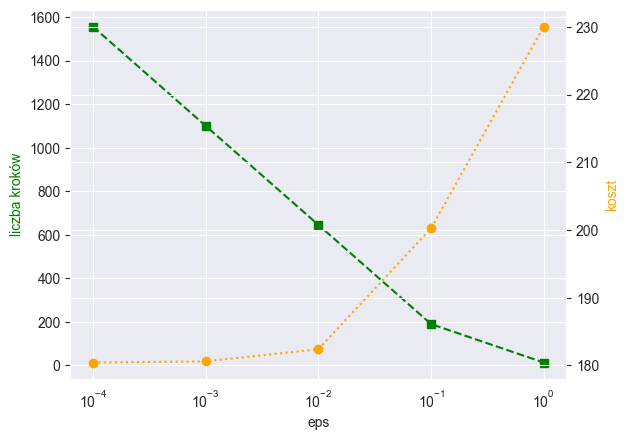

In [68]:
eps_cost_steps_plot(epss, costs, lengths)

In [73]:
x_pred = [50, 100, 200]
best_theta, history = gradient_descent(h, J, [0.0, 0.0], x, y, alpha=0.007, eps=0.001)
for x in x_pred:
    y_pred = h(best_theta, x)
    print(f"X= {x},  Prediction={y_pred}")
print(best_theta)

X= 50,  Prediction=84.25399362320593
X= 100,  Prediction=152.5572666376976
X= 200,  Prediction=289.16381266668094
[15.950720608714265, 1.3660654602898332]


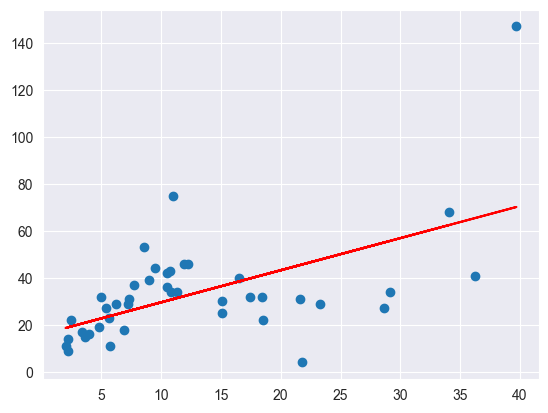

In [72]:
plt.scatter(x,y)
plt.plot(x, h(best_theta, x), c="red")
plt.show()